In [1]:
import tarfile

from pathlib import Path

from fastai.vision.all import *

## Is this ia a dog?

In [12]:
data_path = Path("../data/oxford_iiit_pets/")
models_path = Path("../models")

In [13]:
# We are only using images folder and not annotations folder.
(data_path / "data").mkdir(exist_ok=True, parents=True)

if not (data_path / "data/images").exists():
    with tarfile.open(data_path / "archives/images.tar.gz", "r:gz") as tar:
        tar.extractall(data_path / "data")

pets_data_path = data_path / "data/images"
pets_data_path

Path('../data/oxford_iiit_pets/data/images')

In [14]:
def is_dog(name): return name[0].islower()

Here the model trains on all the images but it learns only weather the images is_dog or not_dog because the is_dog(name) function only returns true if the image is a dog.

In [15]:
# Create image dataloaders
dls = ImageDataLoaders.from_name_func(
    path=pets_data_path,
    fnames=get_image_files(pets_data_path),
    label_func=is_dog,
    seed=42,
    item_tfms=Resize(244)
)

In [16]:
# Train only on gpu for better faster execution.
# Create a learner object
# learner = vision_learner(dls, arch=resnet34, metrics=accuracy)

## EXPORT MODEL AS SOON AS FINE TUNING.

# Fit data to a pretrined model by fine tuning.
# learner.fine_tune(epochs=1)

In [17]:
learner = load_learner("../models/dog.pkl")

Is this a dog?: True.
Probability it's a dog: 0.992220


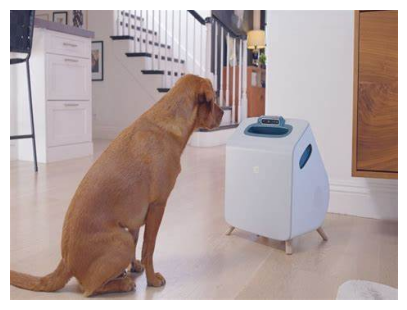

In [19]:
# Predict a image if it is a dog.
img = PILImage.create(data_path / "dog.jpeg")
img.show()

is_dog, _, probs = learner.predict(data_path / "dog.jpeg")

print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

we can check if model learns a cat image.

Is this a dog?: False.
Probability it's a dog: 0.025939


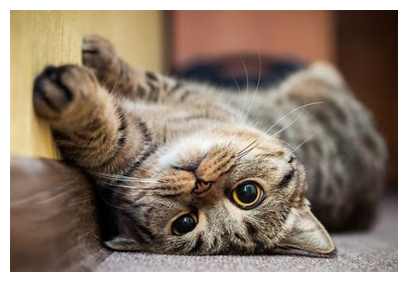

In [20]:
# Predict a image if it is a dog or not_cat.
img = PILImage.create(data_path / "cat.jpeg")
img.show()

is_dog, _, probs = learner.predict(data_path / "cat.jpeg")

print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

## Semantic Object Classes in Video

In [12]:
camvid_data_path = untar_data(URLs.CAMVID_TINY) 

In [34]:
for path in (camvid_data_path / "images").glob("*"):
    print(path)
    print()
    print(path.stem)
    print(path.suffix)
    print()
    print(camvid_data_path/'labels'/f'{path.stem}_P{path.suffix}')
    break

/root/.fastai/data/camvid_tiny/images/Seq05VD_f00210.png

Seq05VD_f00210
.png

/root/.fastai/data/camvid_tiny/labels/Seq05VD_f00210_P.png


In [36]:
dls = SegmentationDataLoaders.from_label_func(
    path=camvid_data_path,
    bs=8,
    fnames=get_image_files(camvid_data_path / "images"),
    label_func = lambda o: camvid_data_path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(camvid_data_path/'codes.txt', dtype=str)
) 

In [38]:
learner = unet_learner(dls, arch=resnet34)
learner.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.630726,2.476445,00:03


epoch,train_loss,valid_loss,time
0,2.155566,1.856088,00:03
1,1.857207,1.313796,00:03
2,1.618726,1.089177,00:03
3,1.455082,0.992538,00:03
4,1.311340,0.950016,00:03
5,1.176924,0.820292,00:03
6,1.064695,0.791943,00:03
7,0.975013,0.790797,00:03


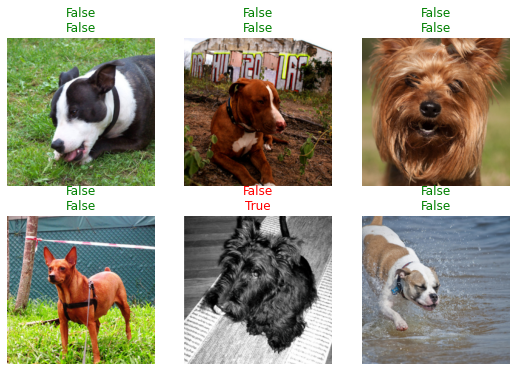

In [19]:
learner.show_results(max_n=6)

## NLP

In [2]:
from fastai.text.all import *

In [3]:
imdb_data_path = untar_data(URLs.IMDB)

In [4]:
dls = TextDataLoaders.from_folder(
    path=imdb_data_path,
    bs=16,
    valid='test',
)

In [5]:
learner = text_classifier_learner(dls, arch=AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learner.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.482371,0.403575,0.818400,09:00


epoch,train_loss,valid_loss,accuracy,time
0,0.316377,0.245605,0.897960,13:33
1,0.252260,0.263774,0.897560,13:33
2,0.201162,0.200910,0.921880,13:33
3,0.192879,0.187320,0.931040,13:33


In [7]:
text_to_predict_positive = """King Kong vs. Godzilla is an exhilarating cinematic experience that kept me at the edge of my seat throughout the entire movie. The film delivers on all fronts: from the stunning special effects and epic battles between the two iconic monsters, to the compelling storyline that keeps you invested in the characters' fates. I particularly enjoyed the dynamic between King Kong and Godzilla, which added an extra layer of excitement to the already intense action scenes. Overall, "King Kong vs. Godzilla" is a must-watch for anyone who loves creature features, epic battles, and a well-executed story that leaves you wanting more."""

text_to_predict_negative = """ "King Kong vs Godzilla" is an overhyped and underwhelming movie that fails to deliver on its promise of a thrilling and exciting monster showdown. The movie lacks any compelling plot or character development, relying solely on its CGI spectacle to capture the audience's attention. Unfortunately, even the special effects fail to impress, with the fight scenes feeling lackluster and poorly choreographed. The movie also suffers from pacing issues, with long stretches of nothing happening followed by rushed action sequences that feel unearned. Overall, "King Kong vs Godzilla" is a forgettable and disappointing addition to the monster movie genre """

learner.predict(text_to_predict_negative)

('neg', tensor(0), tensor([9.9968e-01, 3.1919e-04]))

In [8]:
from fastai.tabular.all import *

In [9]:
path = untar_data(URLs.ADULT_SAMPLE)

In [14]:
dls = TabularDataLoaders.from_csv(
    csv=path / "adult.csv",
    path=path,
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    y_names="salary",
    procs = [Categorify, FillMissing, Normalize]
)

In [15]:
learner = tabular_learner(dls, metrics=accuracy)
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.399040,0.354262,0.835688,00:04
1,0.373950,0.338197,0.841830,00:03
2,0.349414,0.334560,0.842291,00:03


In [16]:
from fastai.collab import *

In [17]:
path = untar_data(URLs.ML_SAMPLE)

In [18]:
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [21]:
learner = collab_learner(dls, y_range=(0.5,5.5))
learner.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.513349,1.407876,00:00


epoch,train_loss,valid_loss,time
0,1.352798,1.348743,00:00
1,1.266445,1.167956,00:00
2,1.008396,0.876843,00:00
3,0.787533,0.749056,00:00
4,0.685844,0.716984,00:00
5,0.642010,0.705081,00:00
6,0.623705,0.699271,00:00
7,0.614577,0.695813,00:00
8,0.609319,0.694965,00:00
9,0.603491,0.694845,00:00


In [22]:
learner.show_results()

,userId,movieId,rating,rating_pred
0,41.0,38.0,4.0,4.297836
1,19.0,39.0,3.0,4.115144
2,49.0,6.0,5.0,4.289078
3,60.0,55.0,5.0,4.762283
4,52.0,38.0,4.0,4.464742
5,48.0,54.0,5.0,4.298166
6,82.0,83.0,5.0,4.091694
7,8.0,8.0,4.0,4.232730
8,45.0,8.0,2.0,3.335930
